In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn
import matplotlib.pyplot as plt
from scipy.special import gamma
import numpy as np
seaborn.set_context("talk", font_scale=1.5)
seaborn.set_style("whitegrid")
%matplotlib inline

In [2]:
def beta_pdf(theta, alpha_0, alpha_1):
    return (gamma(alpha_0 + alpha_1) / (gamma(alpha_0) * gamma(alpha_1))) * (np.power(theta, alpha_1 -1)) * ( np.power((1 - theta), alpha_0-1) ) 

In [27]:
def dirichlet_pdf(thetas, alphas):
    return (gamma(sum([a for a in alphas])) / (np.product([gamma(a) for a in alphas]))) * np.product([np.power(t, a-1) for t, a in zip(thetas, alphas)], axis=0)

In [4]:
eps = 1e-5

def plot(alpha_0=1.0, alpha_1=1.0):
    theta = np.linspace(0+eps, 1-eps, 1000)
    plt.figure(figsize=(10,10))
    f = plt.plot(theta, beta_pdf(theta, alpha_0, alpha_1))
    plt.title("Beta(%2.2f, %2.2f)"%(alpha_0, alpha_1))
    plt.ylabel("Density")
    plt.xlabel("theta")
    plt.ylim(0, 4)
    plt.show()
interactive(plot, alpha_0=(0.0+eps, 5.0), alpha_1=(0.0+eps, 5.0))


A Jupyter Widget

In [ ]:
direclet_pdf([])

<IPython.core.display.Javascript object>


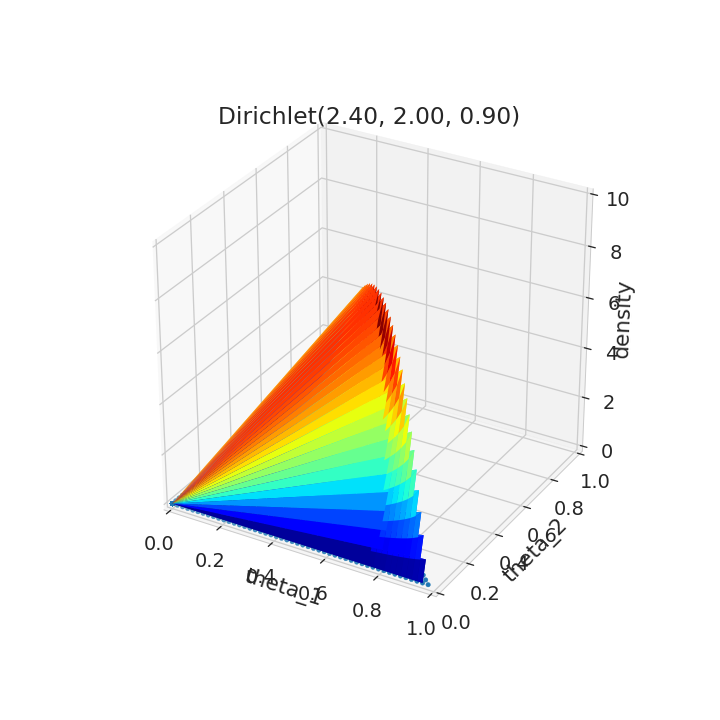

A Jupyter Widget

In [65]:
%matplotlib notebook

eps = 1e-5
from mpl_toolkits.mplot3d import Axes3D
#%mplot3d inline
fig = plt.figure(figsize=(10,10))
plt.clf()
ax = fig.add_subplot(111, projection='3d')

def plot(alpha_1=1.0, alpha_2=1.0, alpha_3=1.0):
    ax.clear()
    #ax.set_figure(figsize=(10,10))
    theta1 = np.linspace(0+eps, 1-eps, 50)
    theta2 = np.linspace(0+eps, 1-eps, 50)
    theta1, theta2 = np.meshgrid(theta1, theta2)
    theta3 = 1.0 - theta1 - theta2

    null = theta3 <= eps
    #plt.figure(figsize=(10,10))
    theta1[null] = eps
    theta2[null] = eps
    theta3[null] = eps
    Z = dirichlet_pdf([theta1, theta2, theta3], [alpha_1, alpha_2, alpha_3])
    Z = np.ma.masked_array(Z, theta3 > eps)
    #theta1 = np.ma.masked_array(theta1, theta3 > eps)
    #theta2 = np.ma.masked_array(theta2, theta3 > eps)

    #Z[null] = 5
    #theta1[null] = 5
    #theta2[null] = 5
    f = ax.plot_surface(theta1, theta2, Z, cmap="jet")
    ax.scatter(theta1, theta2)
    ax.set_title("Dirichlet(%2.2f, %2.2f, %2.2f)"%(alpha_1, alpha_2, alpha_3))
    ax.set_zlim([0, 10])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel("theta_1")
    ax.set_ylabel("theta_2")
    ax.set_zlabel("density")
    #plt.contour(X=theta1, Y=theta2, Z=Z, levels=[1,2])
    #CS2 = plt.contour(CS)
    #plt.title("Beta(%2.2f, %2.2f)"%(alpha_0, alpha_1))
    #plt.show()
#interact_manual(plot, alpha_1=(0.0+eps, 5.0), alpha_2=(0.0+eps, 5.0), alpha_3=(0.0+eps, 5.0));

interactive(plot, alpha_1=(0.0+eps, 5.0), alpha_2=(0.0+eps, 5.0), alpha_3=(0.0+eps, 5.0))